In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [4]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

# Lecture 25

#### `demographics` (2016 election) dataset

##### Least Squares line

In [2]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(6)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3
Alabama,"Congressional District 6 (115th Congress), Alabama",61413,26.1,36.7


**Linear Fit**

$\text{estimate of median income} = a \cdot \text{pctClinton} + b$

In [8]:
predict_voting = demographics.select('Median Income', 'Percent voting for Clinton')
predict_voting = predict_voting.with_columns('Fitted',
    fitted_values(demographics, 'Median Income', 'Percent voting for Clinton'))
predict_voting.show(6)

Median Income,Percent voting for Clinton,Fitted
47083,34.1,46.615
42035,33,45.6518
46544,32.3,46.5121
41110,17.4,45.4753
51690,31.3,47.494
61413,26.1,49.3491


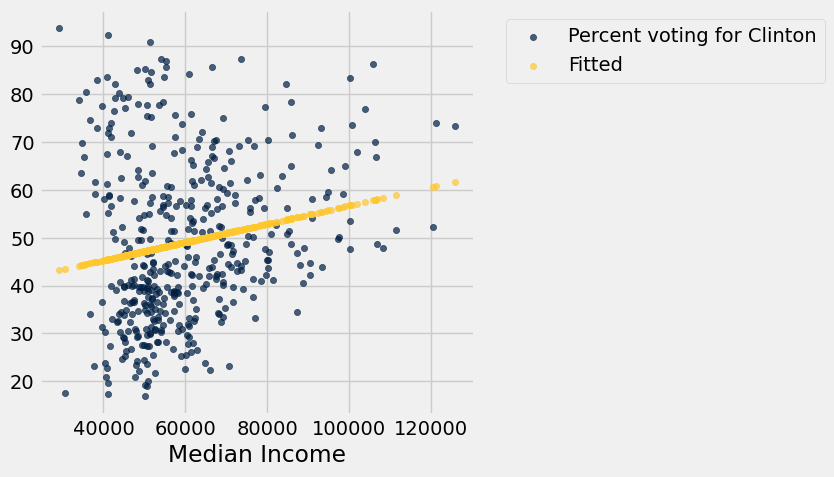

In [6]:
predict_voting.scatter('Median Income')

**Linear Fit**

$\text{estimate of collegePct} = a \cdot \text{median income} + b$

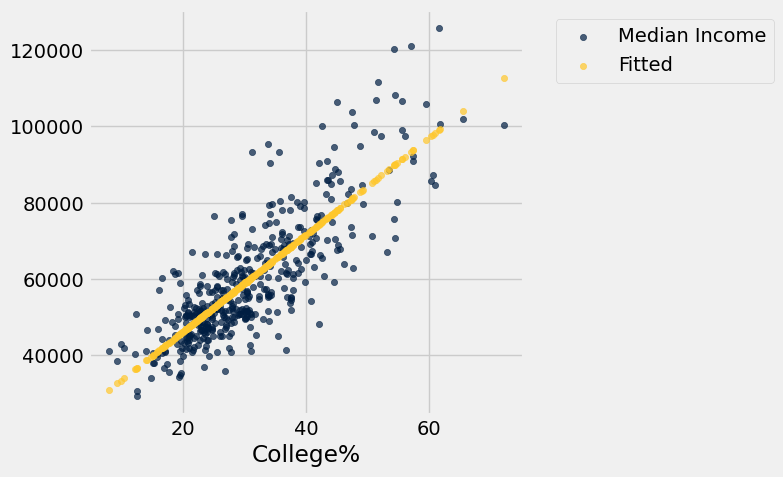

In [7]:
predict_income = demographics.select('College%', 'Median Income')
predict_income = predict_income.with_columns('Fitted',
    fitted_values(demographics, 'College%', 'Median Income'))
predict_income.scatter('College%')

## Residuals

In [11]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [16]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(predict_income, 'College%', 'Median Income'),
    'Residual', residuals(predict_income, 'College%', 'Median Income')
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


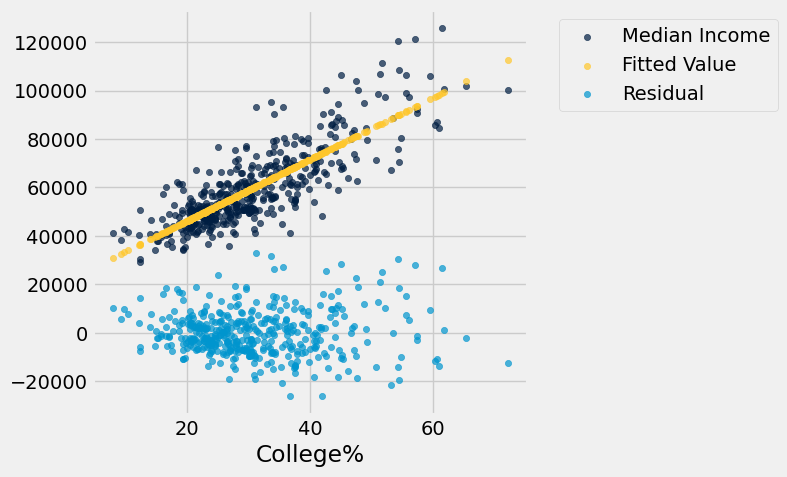

In [17]:
demographics.scatter('College%')

We would like to have these two scattesr on a separate visualization

In [19]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

Predictions are more fuzzy for districts having higher percentages of those going to college.

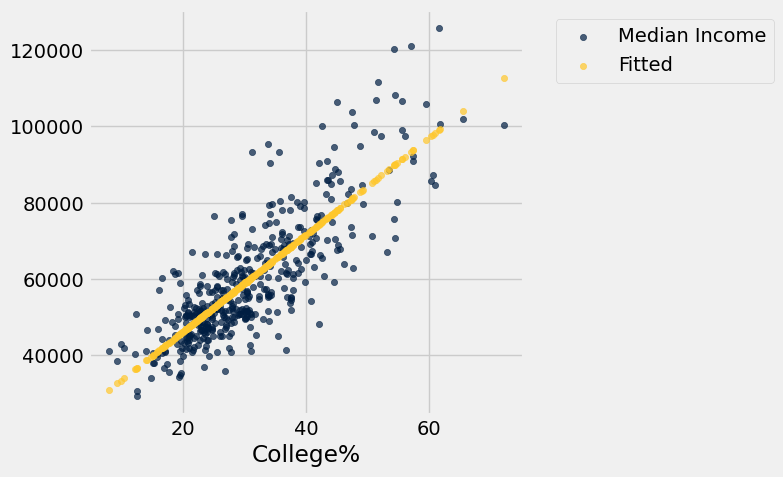

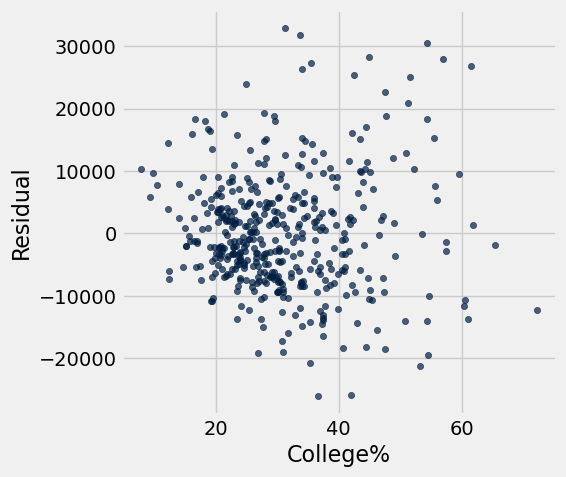

In [20]:
plot_residuals(demographics, 'College%', 'Median Income')

Here is an example where linear regression seems to be a good fit across the range of $x$. 
- We see no pattern in the data.

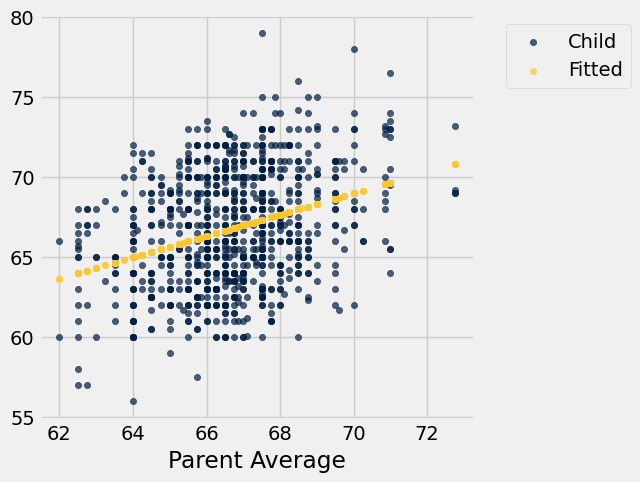

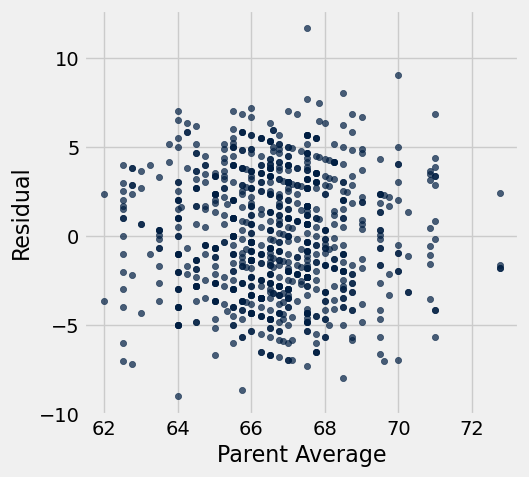

In [21]:
family_heights = Table.read_table('family_heights.csv')
parents = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parents,
    'Child', family_heights.column('child')
    )
plot_residuals(heights, 'Parent Average', 'Child')

## Dugongs ##

In [22]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


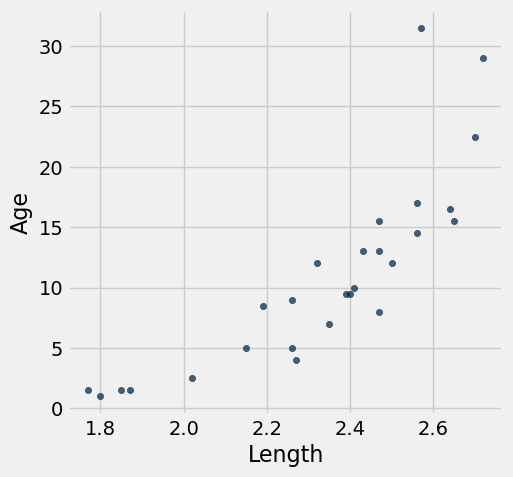

In [23]:
dugong.scatter('Length', 'Age')

In [24]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

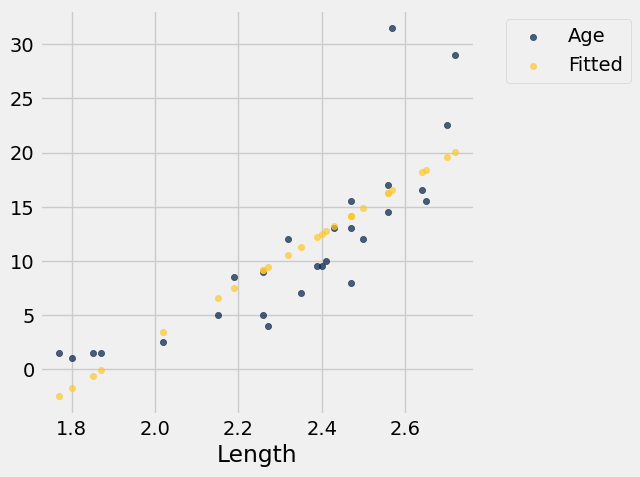

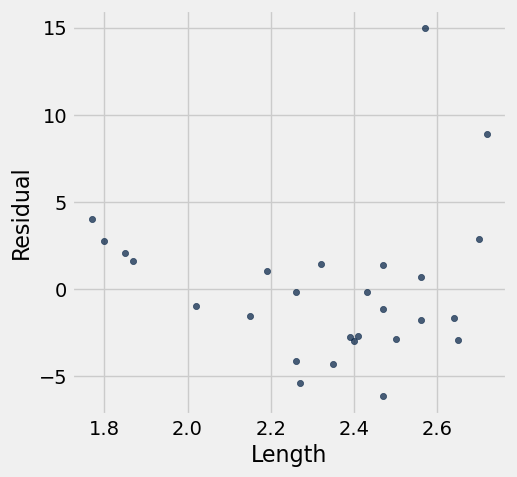

In [25]:
plot_residuals(dugong, 'Length', 'Age')

The linear regression appears to do well predicting age for dugongs having length of 2.0 or more.
- It fails at the small values of length because that is where the quadratic trend shows itself.
                                                       

# US Women

Sometimes, the result of the residual plot is unexpected.

In [27]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


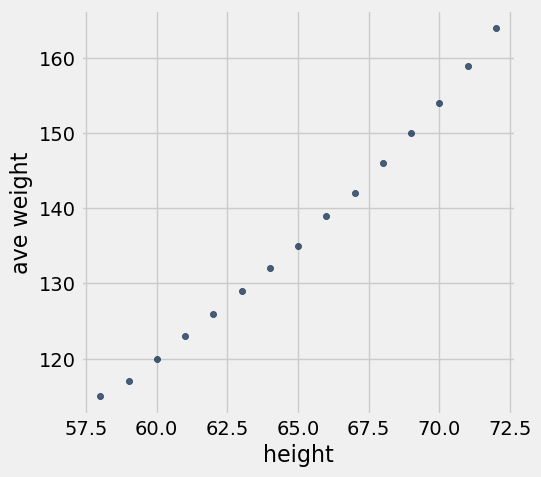

In [28]:
us_women.scatter('height')

In [29]:
correlation(us_women, 'height', 'ave weight')

0.99549476778421608

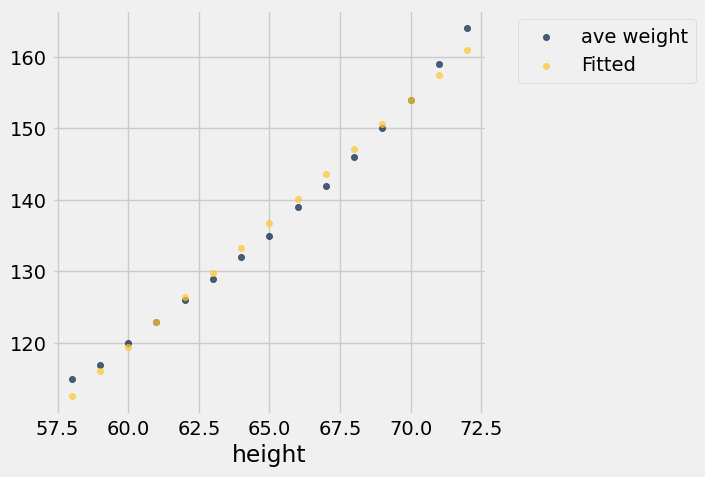

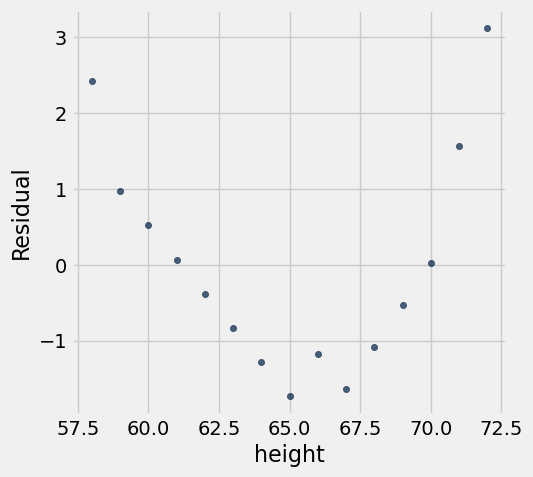

In [30]:
plot_residuals(us_women, 'height', 'ave weight')

If the residuals follow a certain pattern, you may want to incorporate this pattern into your model (such as having a quadratic model).

## Average of Residuals ##

The residuals should have an average of 0.

- Remember: when doing calculations, we can get a very small number which is essentially zero.
- The `round()` function is being used to take this small number and just make it `0.0` (zero).

In [32]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [33]:
round(np.average(residuals(heights, 'Parent Average', 'Child')), 6)

0.0

In [34]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

In [35]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'Parent Average', 'Child'),
    'Fitted Value', fitted_values(heights, 'Parent Average', 'Child')
)


Check from our earlier slides:

In [39]:
round(correlation(heights, 'Parent Average', 'Residual'), 6)

0.0

In [37]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

0.0